# Libraries Used 

In [19]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Scraping Data:  We uses the CoinAPI to fetch historical cryptocurrency price data for Bitcoin (BTC), Ethereum (ETH), and Ripple (XRP) for a specified time period (December 1, 2022, to November 30, 2023) 

In [20]:

api_key = "7A4488"
period_id = "1DAY" 

headers = {
    "X-CoinAPI-Key": api_key,
}

coins = ['BITSTAMP_SPOT_BTC_USD', 'BITSTAMP_SPOT_ETH_USD', 'BITSTAMP_SPOT_XRP_USD']

# Define the time frame for historical data (December 1, 2022, to November 30, 2023)
time_start = "2022-11-01T00:00:00"
time_end = "2023-11-30T00:00:00"

btc_url = f"https://rest.coinapi.io/v1/ohlcv/{coins[0]}/history?period_id={period_id}&time_start={time_start}&time_end={time_end}"
eth_url = f"https://rest.coinapi.io/v1/ohlcv/{coins[1]}/history?period_id={period_id}&time_start={time_start}&time_end={time_end}"
xrp_url = f"https://rest.coinapi.io/v1/ohlcv/{coins[2]}/history?period_id={period_id}&time_start={time_start}&time_end={time_end}"

btc_response = requests.get(btc_url, headers=headers).json()
eth_response = requests.get(eth_url, headers=headers).json()
xrp_response = requests.get(xrp_url, headers=headers).json()

btc_df = pd.DataFrame(btc_response)
eth_df = pd.DataFrame(eth_response)
xrp_df = pd.DataFrame(xrp_response)
btc_df.head()

#add column for coin name and numbering to join dataframes
btc_df['coin'] = 'BTC'
eth_df['coin'] = 'ETH'
xrp_df['coin'] = 'XRP'

#join dataframes
frames = [btc_df, eth_df, xrp_df]
df = pd.concat(frames)
df.head()


,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count,coin
0,2022-11-01T00:00:00.0000000Z,2022-11-02T00:00:00.0000000Z,2022-11-01T00:00:36.3960000Z,2022-11-01T23:59:46.3310000Z,20493.0,20681.0,20334.0,20480.0,1276.691810,12091,BTC
1,2022-11-02T00:00:00.0000000Z,2022-11-03T00:00:00.0000000Z,2022-11-02T00:00:10.0990000Z,2022-11-02T23:59:51.6150000Z,20480.0,20802.0,20055.0,20154.0,2292.082362,15342,BTC
2,2022-11-03T00:00:00.0000000Z,2022-11-04T00:00:00.0000000Z,2022-11-03T00:00:10.1350000Z,2022-11-03T23:59:27.3030000Z,20152.0,20387.0,20039.0,20209.0,1001.180587,12078,BTC
3,2022-11-04T00:00:00.0000000Z,2022-11-05T00:00:00.0000000Z,2022-11-04T00:00:03.0210000Z,2022-11-04T23:59:54.9910000Z,20209.0,21290.0,20184.0,21153.0,3501.475358,22062,BTC
4,2022-11-05T00:00:00.0000000Z,2022-11-06T00:00:00.0000000Z,2022-11-05T00:00:09.2360000Z,2022-11-05T23:59:31.5760000Z,21152.0,21473.0,21089.0,21301.0,774.125220,10367,BTC


# Step 2: Data Cleaning and Structuring :The fetched data is cleaned and structured using a class CryptoData. The data is cleaned by removing missing values, duplicates, and converting data types. A new column 'returns' is added, representing logarithmic returns.

In [7]:

class CryptoData:
    def __init__(self, df):
        self.df = df

    def clean_data(self):
        self.df = self.df.dropna()
        self.df = self.df.drop_duplicates()
        self.df = self.df.reset_index(drop=True)
        self.df = self.df.rename(columns={'time_period_start': 'date'})
        self.df['date'] = pd.to_datetime(self.df['date']).dt.date
        self.df['date'] = pd.to_datetime(self.df['date'])
        self.df['price_close'] = self.df['price_close'].astype(float)
        self.df['price_open'] = self.df['price_open'].astype(float)
        self.df['price_high'] = self.df['price_high'].astype(float)
        self.df['price_low'] = self.df['price_low'].astype(float)
        self.df['volume_traded'] = self.df['volume_traded'].astype(float)
        self.df['trades_count'] = self.df['trades_count'].astype(int)
        self.df = self.df.sort_values(by='date', ascending=True)
        self.df = self.df.reset_index(drop=True)
        return self.df
    #displaying data in a readable format of each row in sentenece form
    def display_data(self):
        for index, row in self.df.iterrows():
            print(f"On {row['date']}, the price of {row['coin']} was ${row['price_close']}.")
        return
    def __str__(self):
        return f"{self.df}"
    
#making objects to display data
obj = CryptoData(df)
obj.clean_data()
obj.display_data()

On 2023-10-01 00:00:00, the price of BTC was $27995.0.
On 2023-10-01 00:00:00, the price of ETH was $1732.1.
On 2023-10-01 00:00:00, the price of XRP was $0.52414.
On 2023-10-02 00:00:00, the price of BTC was $27507.0.
On 2023-10-02 00:00:00, the price of ETH was $1663.0.
On 2023-10-02 00:00:00, the price of XRP was $0.51287.
On 2023-10-03 00:00:00, the price of BTC was $27435.0.
On 2023-10-03 00:00:00, the price of ETH was $1657.1.
On 2023-10-03 00:00:00, the price of XRP was $0.53937.
On 2023-10-04 00:00:00, the price of BTC was $27790.0.
On 2023-10-04 00:00:00, the price of ETH was $1647.0.
On 2023-10-04 00:00:00, the price of XRP was $0.53279.
On 2023-10-05 00:00:00, the price of ETH was $1611.4.
On 2023-10-05 00:00:00, the price of XRP was $0.52299.
On 2023-10-05 00:00:00, the price of BTC was $27417.0.
On 2023-10-06 00:00:00, the price of XRP was $0.52604.
On 2023-10-06 00:00:00, the price of BTC was $27948.0.
On 2023-10-06 00:00:00, the price of ETH was $1646.0.
On 2023-10-07 00

# Step 3: Handling Missing Values: The script identifies and fills missing values in the DataFrame with the value 1

In [8]:

print('The number of missing values in dataframe are: ', df.isnull().sum().sum())
#filling missing values with 1
df = df.fillna(1)
#checking for missing values
print('The number of missing values in dataframe after adding 1 are: ', df.isnull().sum().sum())

The number of missing values in dataframe are:  0
The number of missing values in dataframe after adding 1 are:  0


# Step 4: Data Transformation : Logarithmic returns are calculated for each cryptocurrency. The script also calculates and prints the mean, median, and standard deviation of returns for each

In [9]:
#Step 4: Data Transformation
#transforming price data into logarithmic returns
returns = np.log(df['price_close']/df['price_close'].shift(1))

df['returns'] = abs(returns)

df.head()


,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count,coin,returns
0,2023-10-01T00:00:00.0000000Z,2023-10-02T00:00:00.0000000Z,2023-10-01T00:00:05.0930000Z,2023-10-01T23:59:58.4650000Z,26965.0,28053.0,26959.0,27995.0,1256.362596,12862,BTC,NaN
1,2023-10-02T00:00:00.0000000Z,2023-10-03T00:00:00.0000000Z,2023-10-02T00:00:04.1060000Z,2023-10-02T23:59:59.3580000Z,27995.0,28592.0,27333.0,27507.0,2557.553421,24813,BTC,0.017585
2,2023-10-03T00:00:00.0000000Z,2023-10-04T00:00:00.0000000Z,2023-10-03T00:00:10.2070000Z,2023-10-03T23:59:46.8050000Z,27509.0,27670.0,27170.0,27435.0,1304.303869,17226,BTC,0.002621
3,2023-10-04T00:00:00.0000000Z,2023-10-05T00:00:00.0000000Z,2023-10-04T00:00:07.4540000Z,2023-10-04T23:59:57.6530000Z,27431.0,27831.0,27221.0,27790.0,1262.330852,10892,BTC,0.012857
4,2023-10-05T00:00:00.0000000Z,2023-10-06T00:00:00.0000000Z,2023-10-05T00:00:03.3190000Z,2023-10-05T23:59:56.5340000Z,27787.0,28125.0,27369.0,27417.0,1494.732570,11349,BTC,0.013513


# Step 5: # Correlation Analysis: The script calculates and displays the correlation matrix between the returns of Bitcoin, Ethereum, and Ripple

In [10]:

#convert date column to datetime
df['time_close'] = pd.to_datetime(df['time_close'])


#calculating mean, median and standard deviation of returns
print('The mean of returns for each cryptocurrency is: ', df.groupby('coin')['returns'].mean())
print('The median of returns for each cryptocurrency is: ', df.groupby('coin')['returns'].median())
print('The standard deviation of returns for each cryptocurrency is: ', df.groupby('coin')['returns'].std())

# Identifying the date with the highest return
print('The date with the highest return for Bitcoin is: ', df[df['returns'] == df[df['coin']=='BTC']['returns'].max()]['time_close'])
print('The date with the highest return for Ethereum is: ', df[df['returns'] == df[df['coin']=='ETH']['returns'].max()]['time_close'])
print('The date with the highest return for Ripple is: ', df[df['returns'] == df[df['coin']=='XRP']['returns'].max()]['time_close'])

#determining the correlation matrix between the returns of Bitcoin, Ethereum, and Ripple

returns_df = pd.DataFrame({
    'BTC': df[df['coin'] == 'BTC']['returns'],
    'ETH': df[df['coin'] == 'ETH']['returns'],
    'XRP': df[df['coin'] == 'XRP']['returns']
})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Display the correlation matrix
print("Correlation Matrix between the returns of Bitcoin, Ethereum, and Ripple:")
print(correlation_matrix)

The mean of returns for each cryptocurrency is:  coin
BTC    0.014822
ETH    0.067906
XRP    0.157689
Name: returns, dtype: float64
The median of returns for each cryptocurrency is:  coin
BTC    0.010285
ETH    0.010562
XRP    0.012478
Name: returns, dtype: float64
The standard deviation of returns for each cryptocurrency is:  coin
BTC    0.017609
ETH    0.396552
XRP    1.064112
Name: returns, dtype: float64
The date with the highest return for Bitcoin is:  22   2023-10-23 23:59:55.454000+00:00
Name: time_close, dtype: datetime64[ns, UTC]
The date with the highest return for Ethereum is:  0   2023-10-01 23:59:41.581000+00:00
Name: time_close, dtype: datetime64[ns, UTC]
The date with the highest return for Ripple is:  0   2023-10-01 23:56:04.596000+00:00
Name: time_close, dtype: datetime64[ns, UTC]
Correlation Matrix between the returns of Bitcoin, Ethereum, and Ripple:
          BTC       ETH       XRP
BTC  1.000000  0.642899  0.348612
ETH  0.642899  1.000000  0.998940
XRP  0.348612  0

# Step 6: Data Visualization: The script uses Matplotlib to create line charts showing the historical prices of each cryptocurrency and a bar chart comparing the mean returns of each cryptocurrency

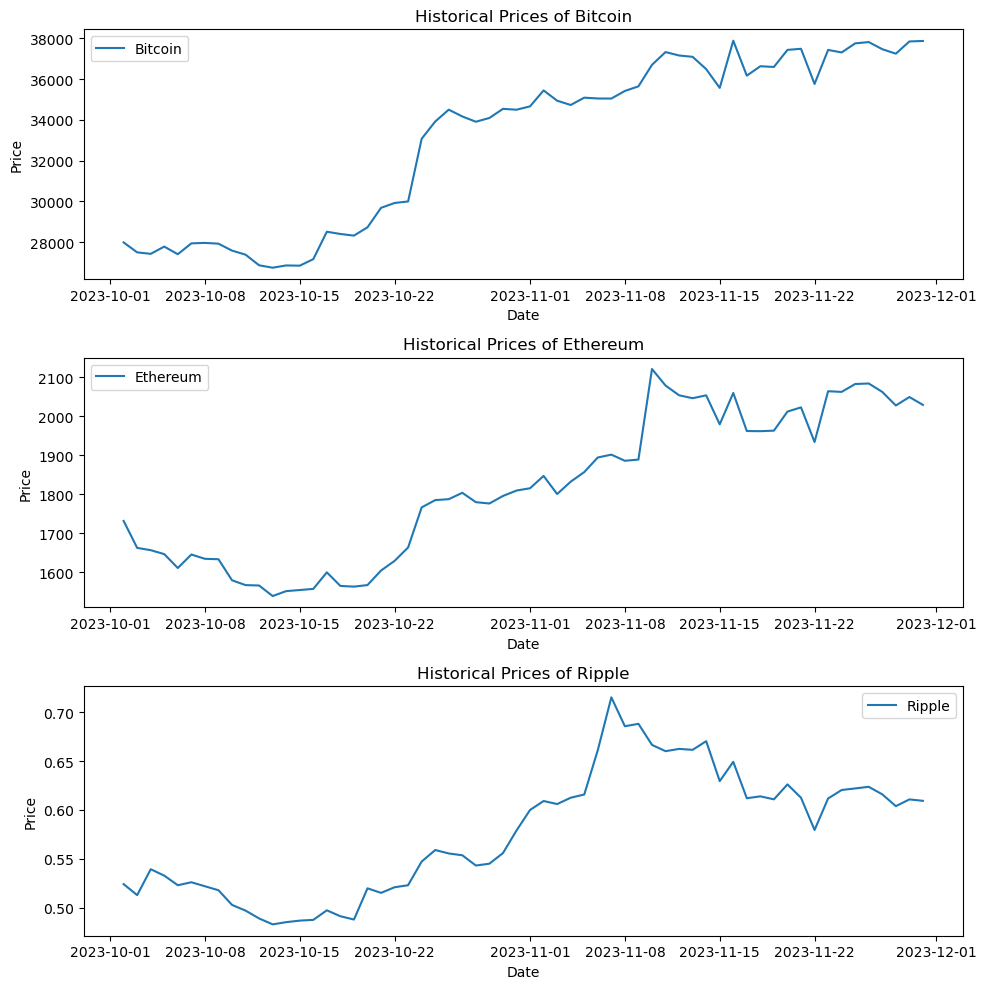

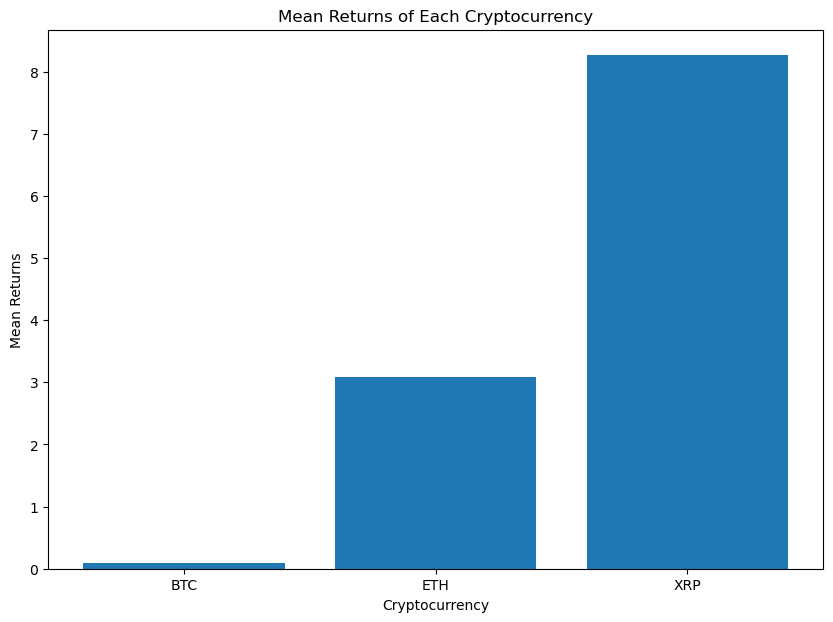

In [11]:

#creating line chart to show the historical prices of each cryptocurrency
plt.figure(figsize=(10, 10))

# Bitcoin
plt.subplot(3, 1, 1)2
plt.plot(df[df['coin']=='BTC']['time_close'], df[df['coin']=='BTC']['price_close'], label='Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Prices of Bitcoin')
plt.legend()

# Ethereum
plt.subplot(3, 1, 2)
plt.plot(df[df['coin']=='ETH']['time_close'], df[df['coin']=='ETH']['price_close'], label='Ethereum')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Prices of Ethereum')
plt.legend()

# Ripple
plt.subplot(3, 1, 3)
plt.plot(df[df['coin']=='XRP']['time_close'], df[df['coin']=='XRP']['price_close'], label='Ripple')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Prices of Ripple')
plt.legend()

plt.tight_layout()
plt.show()

#creating bar chart to compare the mean returns of each cryptocurrency
plt.figure(figsize=(10, 7))
plt.bar(df['coin'], df['returns'])
plt.xlabel('Cryptocurrency')
plt.ylabel('Mean Returns')
plt.title('Mean Returns of Each Cryptocurrency')
plt.show()




# Step 7: Save Results to CSV file: The final DataFrame is saved to a CSV file named 'output.csv'

In [12]:
#Step 7: Save Results to CSV file
print(df)

df.to_csv('output.csv')

               time_period_start               time_period_end  \
0   2023-10-01T00:00:00.0000000Z  2023-10-02T00:00:00.0000000Z   
1   2023-10-02T00:00:00.0000000Z  2023-10-03T00:00:00.0000000Z   
2   2023-10-03T00:00:00.0000000Z  2023-10-04T00:00:00.0000000Z   
3   2023-10-04T00:00:00.0000000Z  2023-10-05T00:00:00.0000000Z   
4   2023-10-05T00:00:00.0000000Z  2023-10-06T00:00:00.0000000Z   
..                           ...                           ...   
55  2023-11-25T00:00:00.0000000Z  2023-11-26T00:00:00.0000000Z   
56  2023-11-26T00:00:00.0000000Z  2023-11-27T00:00:00.0000000Z   
57  2023-11-27T00:00:00.0000000Z  2023-11-28T00:00:00.0000000Z   
58  2023-11-28T00:00:00.0000000Z  2023-11-29T00:00:00.0000000Z   
59  2023-11-29T00:00:00.0000000Z  2023-11-30T00:00:00.0000000Z   

                       time_open                       time_close  \
0   2023-10-01T00:00:05.0930000Z 2023-10-01 23:59:58.465000+00:00   
1   2023-10-02T00:00:04.1060000Z 2023-10-02 23:59:59.358000+00:00   


# Step 8: Summarize Findings


In [ ]:
print('The number of missing values in dataframe are: ', df.isnull().sum().sum())
print("\n")
print('The mean of returns for each cryptocurrency is: ', df.groupby('coin')['returns'].mean())
print("\n")
print('The median of returns for each cryptocurrency is: ', df.groupby('coin')['returns'].median())
print("\n")
print('The standard deviation of returns for each cryptocurrency is: ', df.groupby('coin')['returns'].std())
print("\n")
print('The date with the highest return for Bitcoin is: ', df[df['returns'] == df[df['coin']=='BTC']['returns'].max()]['time_close'])
print("\n")
print('The date with the highest return for Ethereum is: ', df[df['returns'] == df[df['coin']=='ETH']['returns'].max()]['time_close'])
print("\n")
print('The date with the highest return for Ripple is: ', df[df['returns'] == df[df['coin']=='XRP']['returns'].max()]['time_close'])
print("\n")
print("Correlation Matrix between the returns of Bitcoin, Ethereum, and Ripple:")
print(correlation_matrix)

